In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
sns.set_style('darkgrid')

In [3]:
ruta = "../../results/WHCd_Juarez_clean_v3.csv"
datos = pd.read_csv(ruta)
datos.head()

time_num_usa  viento_U  viento_V  pto_rocio  tem_viento     alt_nube  \
0         36526 -1.669281 -0.020920   7.480493   17.317834  1907.450439   
1         36526 -1.951294 -0.468689   8.055566   16.767297  2135.849121   
2         36526 -1.763443 -0.294388   5.953119   14.243799  2208.853027   
3         36526 -1.436081  0.382751   5.892938   11.471796  7484.599609   
4         36526 -0.908798  1.725983   5.761438   11.316980  4100.225235   

    evaporacion  rafaga_viento    evap_media  evap_media_potencial  \
0 -7.220000e-06       2.148321 -2.000000e-06         -3.470000e-06   
1 -1.550000e-06       2.747254 -4.300000e-07         -1.910000e-07   
2 -4.540000e-07       2.561296 -1.230000e-07          1.860000e-07   
3  3.110000e-07       2.200583  8.660000e-08          3.350000e-07   
4  6.010000e-07       2.526732  1.660000e-07          3.180000e-07   

   pm_nivel_del_mar  evap_potencial  tip_precipitacion  temp_del_suelo  \
0       1012.635625   -1.250000e-05                  0       13.064264   
1       1012.456250   -6.860000e-07                  0       12.453210   
2       1012.368125    6.660000e-07                  0       10.392664   
3       1012.543125    1.220000e-06                  0        8.273584   
4       1012.673750    1.130000e-06                  0        7.544336   

   agua_del_suelo  nubosidad  precip_acum_x_hora  angulo_viento  dir_viento  \
0        0.137127   0.152496                 0.0             89           1   
1        0.137084   0.236725                 0.0             76           1   
2        0.137066   0.579987                 0.0             81           1   
3        0.137028   0.482239                 0.0            105           1   
4        0.137005   0.411499                 0.0            152           2   

   vel_viento  
0    1.669412  
1    2.006793  
2    1.787847  
3    1.486212  
4    1.950623

In [4]:
'''parametros_clima = datos[['viento_U', 'viento_V', 'pto_rocio', 'tem_viento', 'alt_nube', 'evaporacion', 'rafaga_viento', 'evap_media', 'evap_media_potencial',
                          'pm_nivel_del_mar', 'evap_potencial', 'tip_precipitacion', 'temp_del_suelo', 'agua_del_suelo', 'nubosidad', 'precip_acum_x_hora', 'angulo_viento', 'dir_viento', 'vel_viento']]'''

"parametros_clima = datos[['viento_U', 'viento_V', 'pto_rocio', 'tem_viento', 'alt_nube', 'evaporacion', 'rafaga_viento', 'evap_media', 'evap_media_potencial',\n                          'pm_nivel_del_mar', 'evap_potencial', 'tip_precipitacion', 'temp_del_suelo', 'agua_del_suelo', 'nubosidad', 'precip_acum_x_hora', 'angulo_viento', 'dir_viento', 'vel_viento']]"

In [5]:
parametros_clima = datos[['viento_U', 'viento_V', 'dir_viento']]

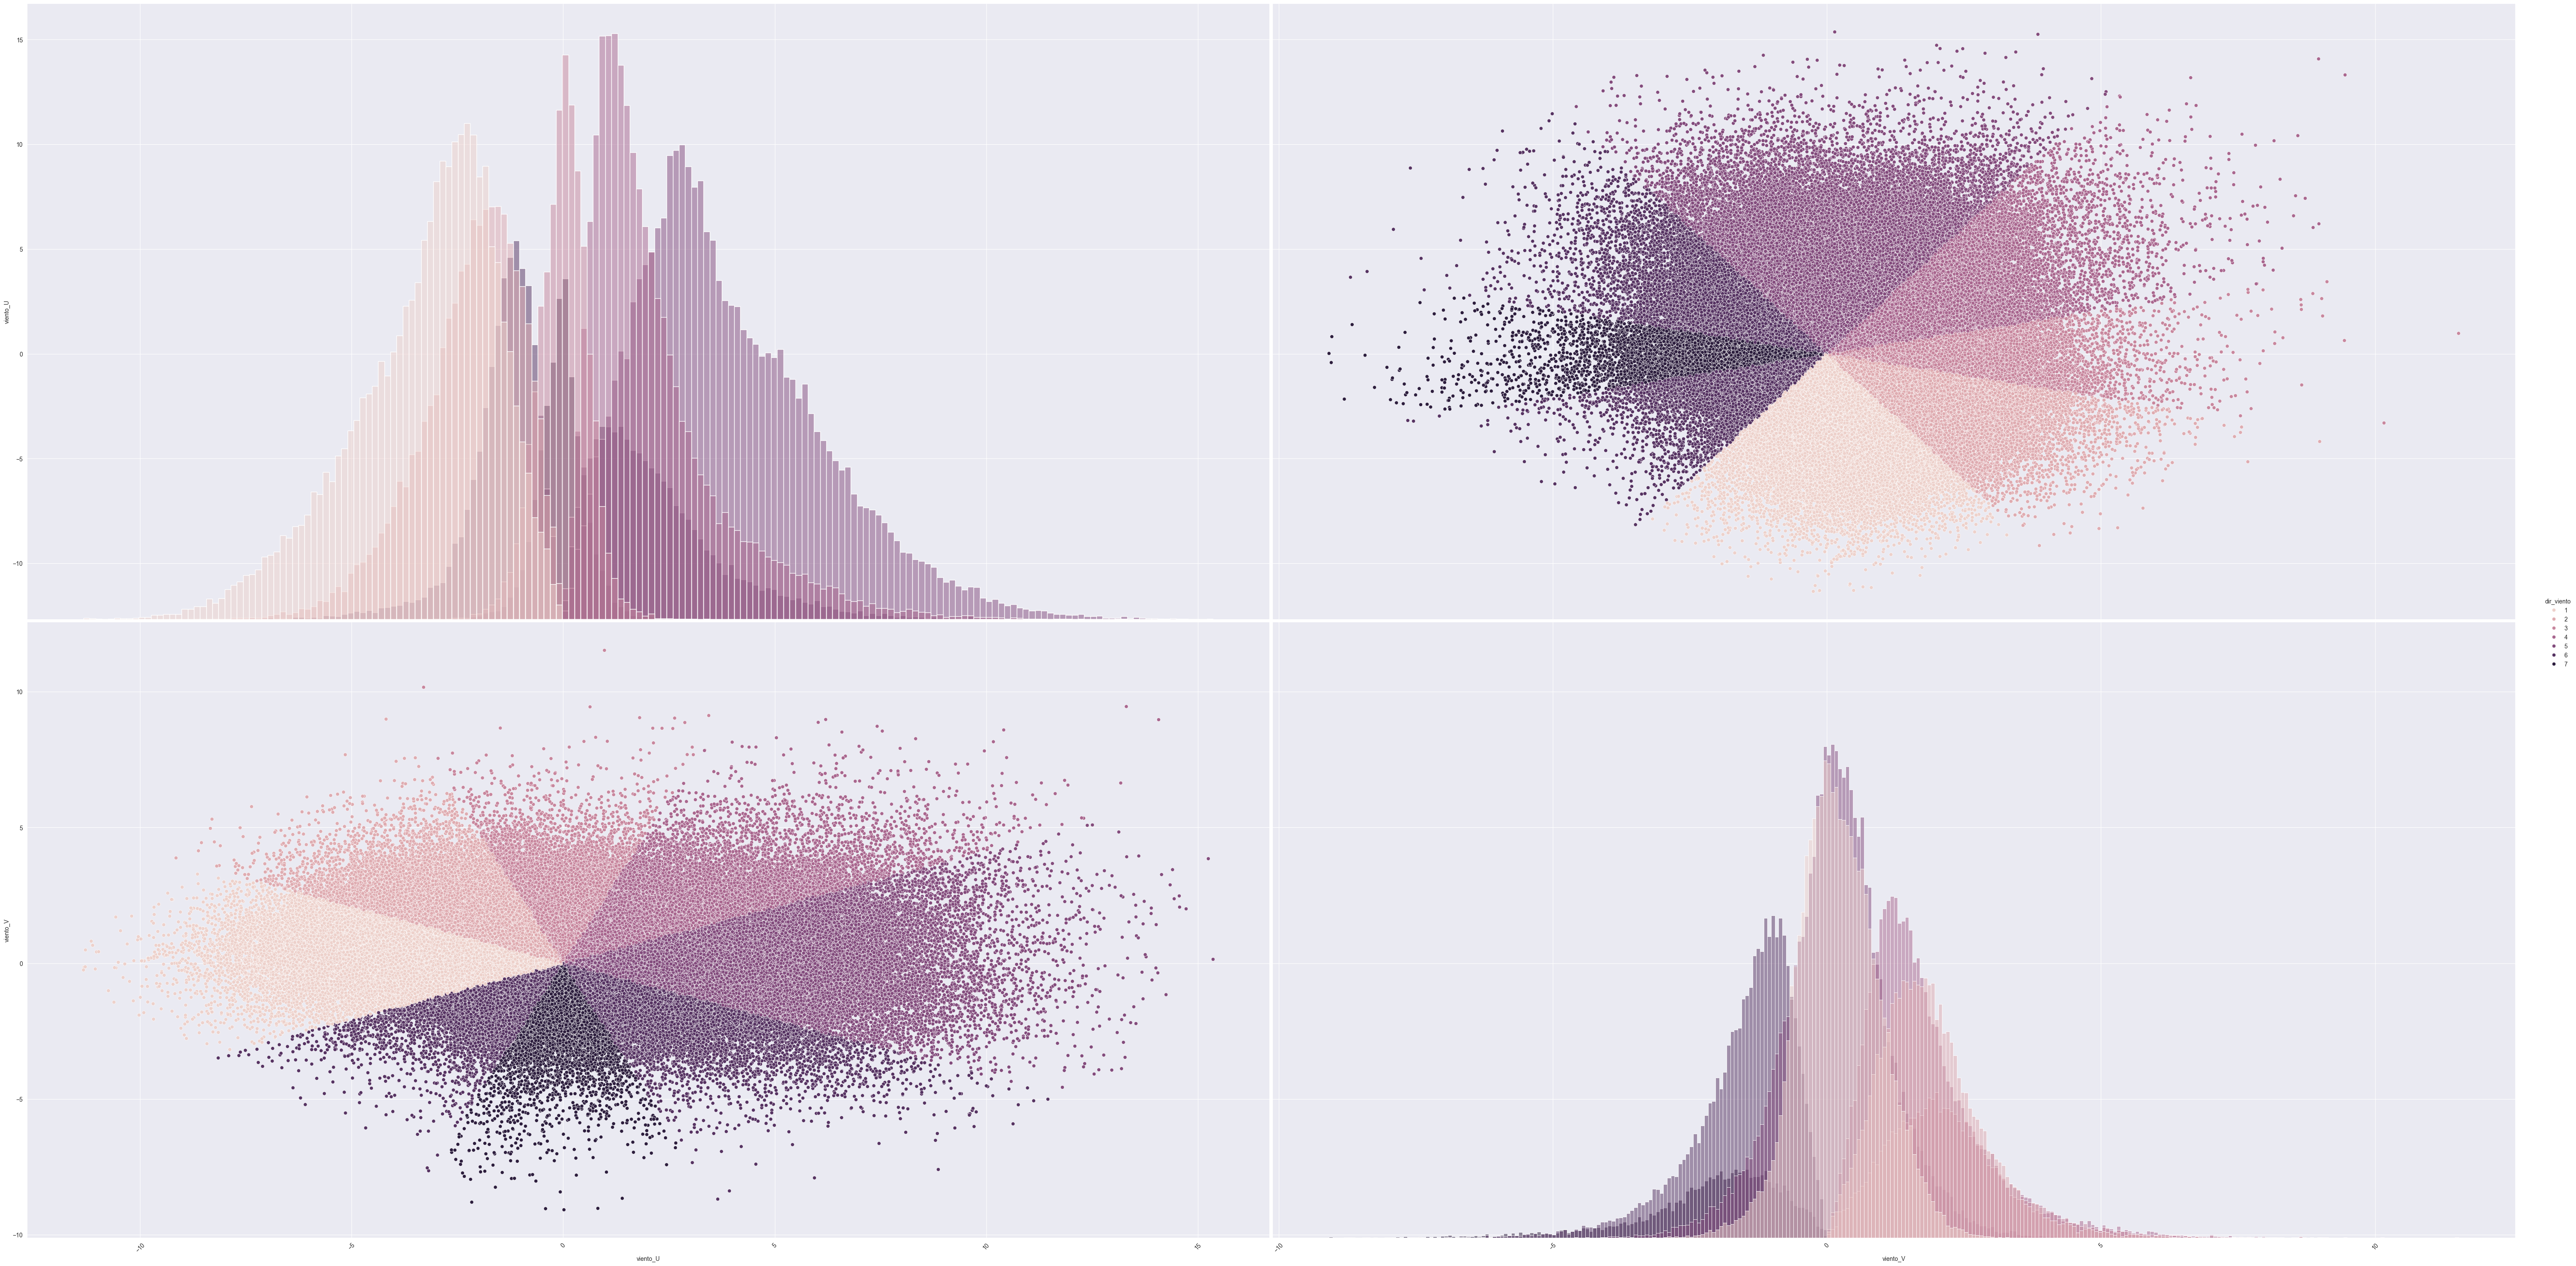

In [9]:
graficos = sns.pairplot(parametros_clima, hue='dir_viento', diag_kind="hist", height=15, aspect=2.0)
for ax in graficos.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

In [124]:
fecha_usa_num = datos['time_num_usa'].values
temp_viento = datos['tem_viento'].values
altura_nube = datos['alt_nube'].values
rafaga_viento = datos['rafaga_viento'].values
temp_suelo = datos['temp_del_suelo'].values
agua_suelo = datos['agua_del_suelo'].values
nubosidad = datos['nubosidad'].values
dir_viento = datos['dir_viento'].values
vel_viento = datos['vel_viento'].values

In [125]:
X=np.array([fecha_usa_num,temp_viento,altura_nube,rafaga_viento,agua_suelo,nubosidad,dir_viento,vel_viento]).T
Y=np.array(temp_suelo)

In [126]:
modelo_reg = LinearRegression()
modelo_reg = modelo_reg.fit(X, Y)
Y_pred = modelo_reg.predict(X)
error = np.sqrt(mean_squared_error(Y, Y_pred))
r2 = modelo_reg.score(X, Y)
print("Error cuadratico: ", error)
print("El valor de r^2 es: ", r2)
print("Los coeficientes son: \n", modelo_reg.coef_)

El error es:  2.6514768372177473
El valor de r^2 es:  0.9504681315553342
Los coeficientes son: 
 [-3.53963416e-05  1.15860415e+00 -3.09403316e-04  3.77413326e-01
 -5.08727140e+00  6.87838956e-01 -7.77090909e-02 -5.29368817e-01]


In [150]:
import random
from datetime import datetime
from babel.dates import format_date, format_datetime, format_time
from ipywidgets import widgets
from IPython.display import display

# fecha=widgets.Text(description="Ingresa un fecha ")

fecha_usa_num = 12152023
temp_viento = round(random.uniform(-17.0, 43.0), 10)
altura_nube = round(random.uniform(28000.0, 1448000.0), 10)
rafaga_viento = round(random.uniform(0.6, 32.0), 10)
temp_suelo = round(random.uniform(-14.0, 54.0), 10)
agua_suelo = round(random.uniform(-005000.0, 0.39), 10)
nubosidad = round(random.uniform(0.0, 1.0), 10)
dir_viento = random.randint(1, 7)
vel_viento = round(random.uniform(0.0, 17), 10)

fecha_americana = str(fecha_usa_num)

fecha = datetime.strptime(fecha_americana, "%m%d%Y")

fecha_normal = format_date(fecha, format='full', locale='es')

temperaturas = modelo_reg.predict(
    [[fecha_usa_num, temp_viento, altura_nube, rafaga_viento, agua_suelo, nubosidad, dir_viento, vel_viento]])

print(f"Temperatura del suelo para el {fecha_normal} es {temperaturas}°C")

Temperatura del suelo para el viernes, 15 de diciembre de 2023 es [13895.94144557]°C


In [77]:
import random
from datetime import datetime
from babel.dates import format_date, format_datetime, format_time
from ipywidgets import widgets
from IPython.display import display

temp_viento = round(random.uniform(-17.0, 43.0), 10)
altura_nube = round(random.uniform(28000.0, 1448000.0), 10)
rafaga_viento = round(random.uniform(0.6, 32.0), 10)
temp_suelo = round(random.uniform(-14.0, 54.0), 10)
agua_suelo = round(random.uniform(-005000.0, 0.39), 10)
nubosidad = round(random.uniform(0.0, 1.0), 10)
dir_viento = random.randint(1, 7)
vel_viento = round(random.uniform(0.0, 17), 10)


def convertir_fecha(fecha):
    if fecha is not None:
        fecha_datetime = datetime.combine(fecha, datetime.min.time())

        fecha_americana = fecha_datetime.strftime("%m%d%Y")

        fecha_numerica = int(fecha_americana)

        return fecha_americana, fecha_numerica
    else:
        return None, None


# Creando widgets
fecha_widget = widgets.DatePicker(description="Selecciona una fecha:")

display(fecha_widget)

fecha_seleccionada = fecha_widget.value

fecha_americana, fecha_numerica = convertir_fecha(fecha_seleccionada)

print(f"Temperatura del suelo para al fecha: \n", modelo_reg.predict(
    [[fecha_numerica, temp_viento, altura_nube, rafaga_viento, agua_suelo, nubosidad, dir_viento, vel_viento]]))